### Importación de datos



In [51]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Lista para iterar
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación


In [41]:
facturacion = {}
for i, df in enumerate(tiendas):
    facturacion[nombres_tiendas[i]] = df["Precio"].sum()
facturacion_df = pd.DataFrame(list(facturacion.items()), columns=["Tienda", "Ingreso Total"])
print("Ingreso total por tienda:")
print(facturacion_df)

Ingreso total por tienda:
     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


# 2. Ventas por categoría

In [42]:
ventas_categoria = {}
for i, df in enumerate(tiendas):
    ventas_categoria[nombres_tiendas[i]] = df.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False)
    print(f"\nVentas por categoría - {nombres_tiendas[i]}:")
    print(ventas_categoria[nombres_tiendas[i]])


Ventas por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64

Ventas por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64

Ventas por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int6

# 3. Calificación promedio de la tienda


In [43]:
calificacion_promedio = {}
for i, df in enumerate(tiendas):
    calificacion_promedio[nombres_tiendas[i]] = df["Calificación"].mean()
calificacion_df = pd.DataFrame(list(calificacion_promedio.items()), columns=["Tienda", "Calificación Promedio"])
print("\nCalificación promedio por tienda:")
print(calificacion_df)


Calificación promedio por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


# 4. Productos más y menos vendidos

In [44]:
productos_extremos = {}
for i, df in enumerate(tiendas):
    conteo_productos = df.groupby("Producto")["Producto"].count().sort_values(ascending=False)
    productos_extremos[nombres_tiendas[i]] = {
        "mas_vendido": conteo_productos.head(1),
        "menos_vendido": conteo_productos.tail(1)
    }
    print(f"\n{nombres_tiendas[i]} - Producto más vendido:")
    print(productos_extremos[nombres_tiendas[i]]["mas_vendido"])
    print(f"{nombres_tiendas[i]} - Producto menos vendido:")
    print(productos_extremos[nombres_tiendas[i]]["menos_vendido"])


Tienda 1 - Producto más vendido:
Producto
Armario    60
Name: Producto, dtype: int64
Tienda 1 - Producto menos vendido:
Producto
Auriculares con micrófono    33
Name: Producto, dtype: int64

Tienda 2 - Producto más vendido:
Producto
Iniciando en programación    65
Name: Producto, dtype: int64
Tienda 2 - Producto menos vendido:
Producto
Juego de mesa    32
Name: Producto, dtype: int64

Tienda 3 - Producto más vendido:
Producto
Kit de bancas    57
Name: Producto, dtype: int64
Tienda 3 - Producto menos vendido:
Producto
Bloques de construcción    35
Name: Producto, dtype: int64

Tienda 4 - Producto más vendido:
Producto
Cama box    62
Name: Producto, dtype: int64
Tienda 4 - Producto menos vendido:
Producto
Guitarra eléctrica    33
Name: Producto, dtype: int64


# 5. Envío promedio por tienda

In [45]:
envio_promedio = {}
for i, df in enumerate(tiendas):
    envio_promedio[nombres_tiendas[i]] = df["Costo de envío"].mean()
envio_df = pd.DataFrame(list(envio_promedio.items()), columns=["Tienda", "Costo de envío promedio"])
print("\nCosto de envío promedio por tienda:")
print(envio_df)


Costo de envío promedio por tienda:
     Tienda  Costo de envío promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


# 6. Graficos

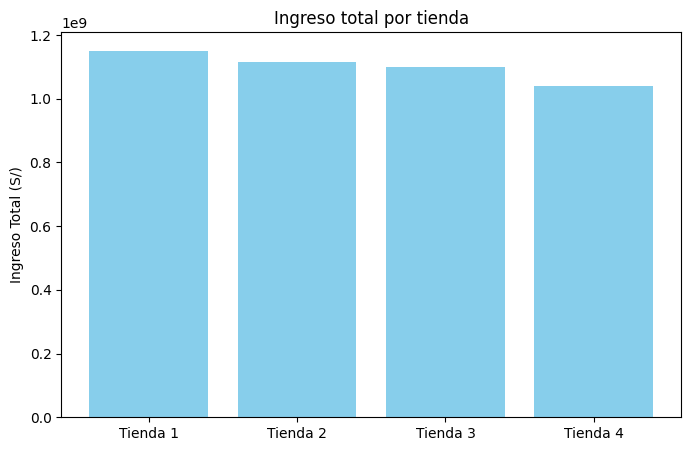

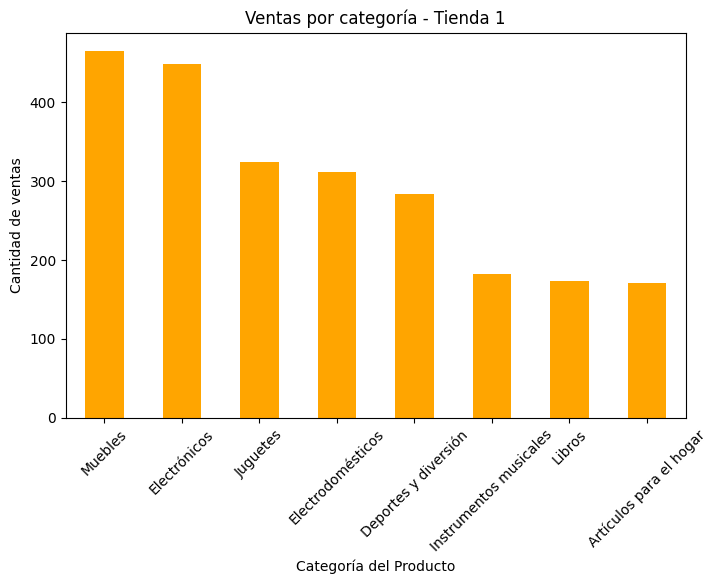

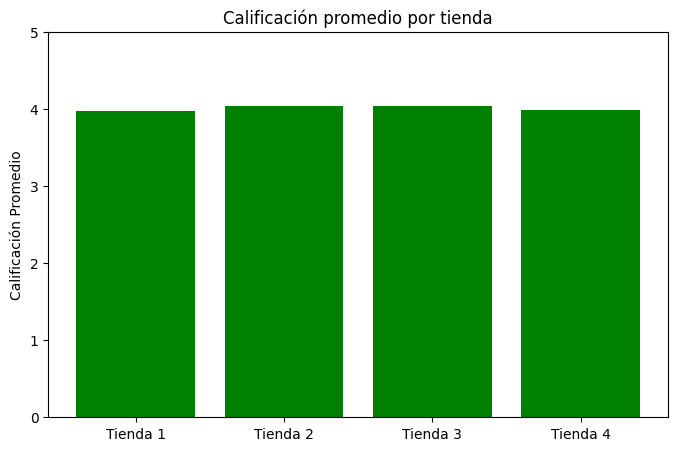

In [46]:
# Gráfico 1: Ingreso total por tienda
plt.figure(figsize=(8,5))
plt.bar(facturacion_df["Tienda"], facturacion_df["Ingreso Total"], color="skyblue")
plt.title("Ingreso total por tienda")
plt.ylabel("Ingreso Total (S/)")
plt.show()

# Gráfico 2: Ventas por categoría - Ejemplo Tienda 1
plt.figure(figsize=(8,5))
ventas_categoria["Tienda 1"].plot(kind="bar", color="orange")
plt.title("Ventas por categoría - Tienda 1")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Calificación promedio por tienda
plt.figure(figsize=(8,5))
plt.bar(calificacion_df["Tienda"], calificacion_df["Calificación Promedio"], color="green")
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)
plt.show()

# 7. Recomendación de tienda a vender - tienda recomendada

In [47]:
ranking = facturacion_df.merge(calificacion_df, on="Tienda").merge(envio_df, on="Tienda")
ranking["Puntaje"] = ranking["Ingreso Total"].rank(ascending=False) + ranking["Calificación Promedio"].rank(ascending=False) + ranking["Costo de envío promedio"].rank(ascending=True)
ranking = ranking.sort_values("Puntaje", ascending=False)

print("\nRanking de tiendas (mayor puntaje = peor desempeño):")
print(ranking)

tienda_a_vender = ranking.iloc[0]["Tienda"]
print(f"\n Recomendación: El Sr. Juan debería vender **{tienda_a_vender}**, ya que presenta el desempeño general más bajo.")

indice_tienda = nombres_tiendas.index(tienda_a_vender)
df_tienda_recomendada = tiendas[indice_tienda]

# Categorías más y menos vendidas
categorias_menos = df_tienda_recomendada.groupby("Categoría del Producto")["Producto"].count().sort_values().head(3)
categorias_mas = df_tienda_recomendada.groupby("Categoría del Producto")["Producto"].count().sort_values(ascending=False).head(3)

print(f"\nAnálisis detallado de {tienda_a_vender}:")
print("\nCategorías más vendidas:")
print(categorias_mas)
print("\nCategorías menos vendidas:")
print(categorias_menos)

print("\nProducto más vendido:")
print(productos_extremos[tienda_a_vender]["mas_vendido"])
print("\nProducto menos vendido:")
print(productos_extremos[tienda_a_vender]["menos_vendido"])


Ranking de tiendas (mayor puntaje = peor desempeño):
     Tienda  Ingreso Total  Calificación Promedio  Costo de envío promedio  \
0  Tienda 1   1.150880e+09               3.976685             26018.609580   
3  Tienda 4   1.038376e+09               3.995759             23459.457167   
1  Tienda 2   1.116344e+09               4.037304             25216.235693   
2  Tienda 3   1.098020e+09               4.048326             24805.680373   

   Puntaje  
0      9.0  
3      8.0  
1      7.0  
2      6.0  

 Recomendación: El Sr. Juan debería vender **Tienda 1**, ya que presenta el desempeño general más bajo.

Análisis detallado de Tienda 1:

Categorías más vendidas:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: Producto, dtype: int64

Categorías menos vendidas:
Categoría del Producto
Artículos para el hogar    171
Libros                     173
Instrumentos musicales     182
Name: Producto, dtype: int64

Producto más vendido:
Producto
Armario  